In [30]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

## Files and Field Descriptions
- train.csv - the training set, comprising measurements of traffic congestion across 65 roadways from April through September of 1991.
    - row_id - a unique identifier for this instance
    - time - the 20-minute period in which each measurement was taken
    - x - the east-west midpoint coordinate of the roadway
    - y - the north-south midpoint coordinate of the roadway
    - direction - the direction of travel of the roadway. EB indicates "eastbound" travel, for example, while SW indicates a "southwest" direction of travel.
    - congestion - congestion levels for the roadway during each hour; the target. The congestion measurements have been normalized to the range 0 to 100.
- test.csv - the test set; you will make hourly predictions for roadways identified by a coordinate location and a direction of travel on the day of 1991-09-30.
- sample_submission.csv - a sample submission file in the correct format

In [31]:
current_directory = os.getcwd()
print(current_directory)
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

/home/data_sci/tabular-playground-series-mar-2022


In [32]:
train.congestion.value_counts().sort_index()

0      881
1       48
2      256
3      164
4      180
      ... 
96     216
97     104
98      87
99      42
100    222
Name: congestion, Length: 101, dtype: int64

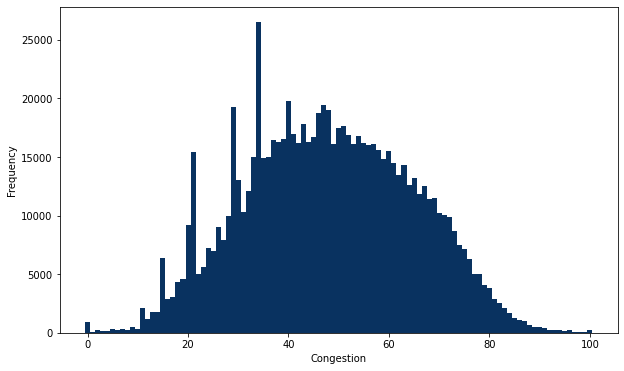

In [4]:
plt.figure(figsize=(10, 6))
plt.bar( range(0,101),train.congestion.value_counts().sort_index(), width=1, color = "#093260")
plt.ylabel('Frequency')
plt.xlabel('Congestion')
plt.show()

In [33]:
unique_x = train.x.unique()
unique_y = train.y.unique()
unique_direction = train.direction.unique()

print("Unique values of x: ", unique_x)
print("Unique values of y: ", unique_y)
print("Unique directions: ", unique_direction)


Unique values of x:  [0 1 2]
Unique values of y:  [0 1 2 3]
Unique directions:  ['EB' 'NB' 'SB' 'WB' 'NE' 'SW' 'NW' 'SE']


directions counts:
 EB    156708
NB    156708
SB    156708
WB    143649
NE     91413
SW     91413
NW     26118
SE     26118
Name: direction, dtype: int64


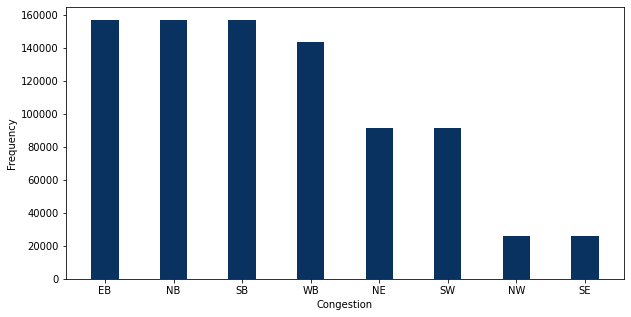

In [34]:
print('directions counts:\n', train.direction.value_counts())

plt.figure(figsize=(10, 5))
plt.bar(unique_direction, train.direction.value_counts(), width=0.4, color = "#093260")

plt.ylabel('Frequency')
plt.xlabel('Congestion')
plt.show()

In [35]:
x_train = pd.concat([train, test])
x_train = x_train.drop('congestion', axis=1)
y_train = train['congestion']

In [36]:
cat_dir = []

### map each color to an integer
mapping = {}

for i in range(unique_direction.shape[0]):
  mapping[unique_direction[i]] = i

# integer representation
for x in x_train.direction:
  cat_dir.append(mapping[x])

In [37]:
x_train.drop('direction',axis =1)
x_train['direction'] = cat_dir

In [38]:
x_train = x_train.drop('row_id',axis =1)

In [39]:
x_train['time'] = pd.to_datetime(x_train['time'])

In [40]:
x_train['month'] = x_train['time'].dt.month
x_train['day'] = x_train['time'].dt.day
x_train['hour'] = x_train['time'].dt.hour
x_train['minute'] = x_train['time'].dt.minute
x_train['second'] = x_train['time'].dt.second
x_train = x_train.drop(['time'],axis=1)

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'direction'}>],
       [<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'hour'}>],
       [<AxesSubplot:title={'center':'minute'}>,
        <AxesSubplot:title={'center':'second'}>, <AxesSubplot:>]],
      dtype=object)

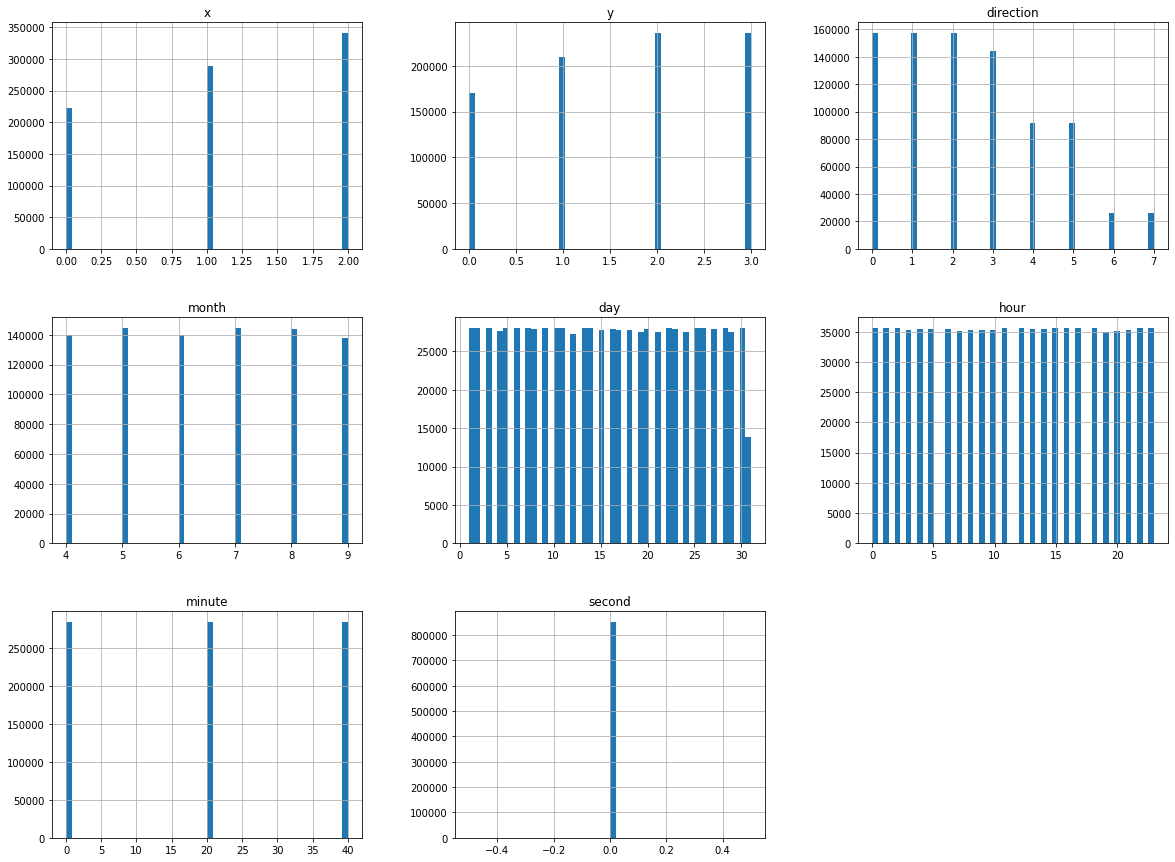

In [41]:
x_train.hist(bins=50, figsize=(20,15))

In [42]:
x_train = x_train.drop(['second'],axis=1)

In [43]:
x_train.head(10)

,x,y,direction,month,day,hour,minute
0,0,0,0,4,1,0,0
1,0,0,1,4,1,0,0
2,0,0,2,4,1,0,0
3,0,1,0,4,1,0,0
4,0,1,1,4,1,0,0
5,0,1,2,4,1,0,0
6,0,1,3,4,1,0,0
7,0,2,0,4,1,0,0
8,0,2,1,4,1,0,0
9,0,2,2,4,1,0,0


In [44]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851175 entries, 0 to 2339
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   x          851175 non-null  int64
 1   y          851175 non-null  int64
 2   direction  851175 non-null  int64
 3   month      851175 non-null  int64
 4   day        851175 non-null  int64
 5   hour       851175 non-null  int64
 6   minute     851175 non-null  int64
dtypes: int64(7)
memory usage: 52.0 MB


In [45]:
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train -= mean
x_train /= std

In [46]:
x_train.head(10)

,x,y,direction,month,day,hour,minute
0,-1.420452,-1.496971,-1.286808,-1.469052,-1.671976,-1.659647,-1.225493
1,-1.420452,-1.496971,-0.757425,-1.469052,-1.671976,-1.659647,-1.225493
2,-1.420452,-1.496971,-0.228042,-1.469052,-1.671976,-1.659647,-1.225493
3,-1.420452,-0.579017,-1.286808,-1.469052,-1.671976,-1.659647,-1.225493
4,-1.420452,-0.579017,-0.757425,-1.469052,-1.671976,-1.659647,-1.225493
5,-1.420452,-0.579017,-0.228042,-1.469052,-1.671976,-1.659647,-1.225493
6,-1.420452,-0.579017,0.301341,-1.469052,-1.671976,-1.659647,-1.225493
7,-1.420452,0.338937,-1.286808,-1.469052,-1.671976,-1.659647,-1.225493
8,-1.420452,0.338937,-0.757425,-1.469052,-1.671976,-1.659647,-1.225493
9,-1.420452,0.338937,-0.228042,-1.469052,-1.671976,-1.659647,-1.225493


In [47]:
print(y_train.shape[-1])
print(x_train.shape)


848835
(851175, 7)


In [48]:
x_test = x_train[y_train.shape[-1]:]
x_train = x_train[:y_train.shape[-1]]

Spilt train and test form x_train

In [49]:
print(x_test.shape)
print(x_train.shape)
print(y_train.shape)

(2340, 7)
(848835, 7)
(848835,)


In [50]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

In [51]:
from keras.models import Sequential
from keras.layers import BatchNormalization, Dense, Dropout
from keras import optimizers
from keras import losses
from keras import metrics


In [24]:
def build_model(input_shape):

        model = Sequential()
        model.add(Dense(32, activation='relu', input_shape=input_shape))
        model.add(Dropout(0.2))
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(1, activation='relu'))
        model.compile(optimizer=optimizers.adam_v2.Adam(learning_rate=0.001), loss=losses.mse, metrics=metrics.mse)

        return model

In [25]:
from keras import backend as K

# Some memory clean-up
K.clear_session()

In [26]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
num_of_epochs = 50
def fitModel(inputs, targets, epochs, input_shape, batch_size=512, folds=8):
    seed = 124
    np.random.seed(seed)
    kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=seed)
    all_mae_histories = []
    pred_folds = []
#     early_stop_cb = EarlyStopping(monitor= 'val_loss', patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
    k = 1
    for train, test in kfold.split(inputs, targets):
        print('Proccessing Fold#', k)
        
        # create model
        model = build_model(input_shape=input_shape)
        
        # Train the model (in silent mode, verbose=0)
        history = model.fit(inputs[train], targets[train],
                            validation_data=(inputs[test], targets[test]),
                            epochs=epochs, 
                            batch_size=batch_size,
                            verbose=2,
#                             call_back=early_stop_cb,
                           )
        # evaluate the model
        # dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])
        mae_history = history.history['val_mean_squared_error']
        all_mae_histories.append(mae_history)
        score_fold = [np.mean(mae_history)]
        print('SCORE FOLD {} = {}'.format(k,score_fold))
        pred = np.round(model.predict(x_test))
        pred_folds.append(pred)
        model.save('fold_{}.h5'.format(k))
        k += 1
    return all_mae_histories, pred_folds
    
(all_mae_histories, pred_folds) = fitModel(x_train, y_train, epochs=num_of_epochs, input_shape=(x_train.shape[1],))

Proccessing Fold# 1


2022-04-11 07:38:27.086310: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-04-11 07:38:27.112111: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-04-11 07:38:27.112488: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-04-11 07:38:27.113149: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

Epoch 1/50
1451/1451 - 8s - loss: 373.0241 - mean_squared_error: 373.0241 - val_loss: 202.6047 - val_mean_squared_error: 202.6047 - 8s/epoch - 6ms/step
Epoch 2/50
1451/1451 - 8s - loss: 246.5273 - mean_squared_error: 246.5273 - val_loss: 157.4619 - val_mean_squared_error: 157.4619 - 8s/epoch - 6ms/step
Epoch 3/50
1451/1451 - 8s - loss: 209.1185 - mean_squared_error: 209.1185 - val_loss: 139.2977 - val_mean_squared_error: 139.2977 - 8s/epoch - 6ms/step
Epoch 4/50
1451/1451 - 8s - loss: 187.1575 - mean_squared_error: 187.1575 - val_loss: 126.5839 - val_mean_squared_error: 126.5839 - 8s/epoch - 6ms/step
Epoch 5/50
1451/1451 - 8s - loss: 172.9893 - mean_squared_error: 172.9893 - val_loss: 125.8317 - val_mean_squared_error: 125.8317 - 8s/epoch - 6ms/step
Epoch 6/50
1451/1451 - 8s - loss: 163.5336 - mean_squared_error: 163.5336 - val_loss: 120.3323 - val_mean_squared_error: 120.3323 - 8s/epoch - 6ms/step
Epoch 7/50
1451/1451 - 8s - loss: 157.0465 - mean_squared_error: 157.0465 - val_loss: 11

Epoch 5/50
1451/1451 - 8s - loss: 167.9283 - mean_squared_error: 167.9283 - val_loss: 118.0697 - val_mean_squared_error: 118.0697 - 8s/epoch - 6ms/step
Epoch 6/50
1451/1451 - 8s - loss: 159.7539 - mean_squared_error: 159.7539 - val_loss: 119.9870 - val_mean_squared_error: 119.9870 - 8s/epoch - 6ms/step
Epoch 7/50
1451/1451 - 8s - loss: 154.2776 - mean_squared_error: 154.2776 - val_loss: 116.1708 - val_mean_squared_error: 116.1708 - 8s/epoch - 6ms/step
Epoch 8/50
1451/1451 - 8s - loss: 151.3074 - mean_squared_error: 151.3074 - val_loss: 113.3839 - val_mean_squared_error: 113.3839 - 8s/epoch - 6ms/step
Epoch 9/50
1451/1451 - 8s - loss: 148.4848 - mean_squared_error: 148.4848 - val_loss: 112.8192 - val_mean_squared_error: 112.8192 - 8s/epoch - 6ms/step
Epoch 10/50
1451/1451 - 8s - loss: 145.9243 - mean_squared_error: 145.9243 - val_loss: 110.2076 - val_mean_squared_error: 110.2076 - 8s/epoch - 6ms/step
Epoch 11/50
1451/1451 - 8s - loss: 143.8607 - mean_squared_error: 143.8607 - val_loss: 

Epoch 9/50
1451/1451 - 8s - loss: 149.0495 - mean_squared_error: 149.0495 - val_loss: 115.3499 - val_mean_squared_error: 115.3499 - 8s/epoch - 6ms/step
Epoch 10/50
1451/1451 - 8s - loss: 146.3054 - mean_squared_error: 146.3054 - val_loss: 114.7448 - val_mean_squared_error: 114.7448 - 8s/epoch - 6ms/step
Epoch 11/50
1451/1451 - 8s - loss: 144.2872 - mean_squared_error: 144.2872 - val_loss: 114.1474 - val_mean_squared_error: 114.1474 - 8s/epoch - 6ms/step
Epoch 12/50
1451/1451 - 8s - loss: 142.3597 - mean_squared_error: 142.3597 - val_loss: 113.7727 - val_mean_squared_error: 113.7727 - 8s/epoch - 6ms/step
Epoch 13/50
1451/1451 - 8s - loss: 140.5183 - mean_squared_error: 140.5183 - val_loss: 110.0888 - val_mean_squared_error: 110.0888 - 8s/epoch - 6ms/step
Epoch 14/50
1451/1451 - 8s - loss: 139.1264 - mean_squared_error: 139.1264 - val_loss: 112.0925 - val_mean_squared_error: 112.0925 - 8s/epoch - 6ms/step
Epoch 15/50
1451/1451 - 8s - loss: 138.0469 - mean_squared_error: 138.0469 - val_lo

Epoch 13/50
1451/1451 - 8s - loss: 138.6336 - mean_squared_error: 138.6336 - val_loss: 108.2236 - val_mean_squared_error: 108.2236 - 8s/epoch - 6ms/step
Epoch 14/50
1451/1451 - 8s - loss: 137.2773 - mean_squared_error: 137.2773 - val_loss: 110.6406 - val_mean_squared_error: 110.6406 - 8s/epoch - 6ms/step
Epoch 15/50
1451/1451 - 8s - loss: 135.9601 - mean_squared_error: 135.9601 - val_loss: 108.4015 - val_mean_squared_error: 108.4015 - 8s/epoch - 6ms/step
Epoch 16/50
1451/1451 - 8s - loss: 134.7859 - mean_squared_error: 134.7859 - val_loss: 109.9704 - val_mean_squared_error: 109.9704 - 8s/epoch - 6ms/step
Epoch 17/50
1451/1451 - 9s - loss: 133.1341 - mean_squared_error: 133.1341 - val_loss: 108.7673 - val_mean_squared_error: 108.7673 - 9s/epoch - 6ms/step
Epoch 18/50
1451/1451 - 8s - loss: 132.6087 - mean_squared_error: 132.6087 - val_loss: 108.7374 - val_mean_squared_error: 108.7374 - 8s/epoch - 6ms/step
Epoch 19/50
1451/1451 - 8s - loss: 131.3884 - mean_squared_error: 131.3884 - val_l

Epoch 17/50
1451/1451 - 8s - loss: 139.2487 - mean_squared_error: 139.2487 - val_loss: 109.5550 - val_mean_squared_error: 109.5550 - 8s/epoch - 6ms/step
Epoch 18/50
1451/1451 - 8s - loss: 137.9786 - mean_squared_error: 137.9786 - val_loss: 108.7303 - val_mean_squared_error: 108.7303 - 8s/epoch - 6ms/step
Epoch 19/50
1451/1451 - 8s - loss: 136.3570 - mean_squared_error: 136.3570 - val_loss: 105.8314 - val_mean_squared_error: 105.8314 - 8s/epoch - 6ms/step
Epoch 20/50
1451/1451 - 8s - loss: 134.6464 - mean_squared_error: 134.6464 - val_loss: 107.8802 - val_mean_squared_error: 107.8802 - 8s/epoch - 6ms/step
Epoch 21/50
1451/1451 - 8s - loss: 133.7519 - mean_squared_error: 133.7519 - val_loss: 106.1457 - val_mean_squared_error: 106.1457 - 8s/epoch - 6ms/step
Epoch 22/50
1451/1451 - 8s - loss: 132.6151 - mean_squared_error: 132.6151 - val_loss: 107.3049 - val_mean_squared_error: 107.3049 - 8s/epoch - 6ms/step
Epoch 23/50
1451/1451 - 8s - loss: 131.4152 - mean_squared_error: 131.4152 - val_l

Epoch 21/50
1451/1451 - 8s - loss: 132.2643 - mean_squared_error: 132.2643 - val_loss: 108.6983 - val_mean_squared_error: 108.6983 - 8s/epoch - 6ms/step
Epoch 22/50
1451/1451 - 8s - loss: 131.2049 - mean_squared_error: 131.2049 - val_loss: 108.0593 - val_mean_squared_error: 108.0593 - 8s/epoch - 6ms/step
Epoch 23/50
1451/1451 - 8s - loss: 129.9997 - mean_squared_error: 129.9997 - val_loss: 105.3998 - val_mean_squared_error: 105.3998 - 8s/epoch - 6ms/step
Epoch 24/50
1451/1451 - 8s - loss: 129.3356 - mean_squared_error: 129.3356 - val_loss: 106.8662 - val_mean_squared_error: 106.8662 - 8s/epoch - 6ms/step
Epoch 25/50
1451/1451 - 8s - loss: 128.1872 - mean_squared_error: 128.1872 - val_loss: 105.0819 - val_mean_squared_error: 105.0819 - 8s/epoch - 6ms/step
Epoch 26/50
1451/1451 - 8s - loss: 127.3727 - mean_squared_error: 127.3727 - val_loss: 105.3224 - val_mean_squared_error: 105.3224 - 8s/epoch - 6ms/step
Epoch 27/50
1451/1451 - 8s - loss: 126.6953 - mean_squared_error: 126.6953 - val_l

Epoch 25/50
1451/1451 - 8s - loss: 126.8024 - mean_squared_error: 126.8024 - val_loss: 108.5569 - val_mean_squared_error: 108.5569 - 8s/epoch - 6ms/step
Epoch 26/50
1451/1451 - 8s - loss: 125.8696 - mean_squared_error: 125.8696 - val_loss: 107.0905 - val_mean_squared_error: 107.0905 - 8s/epoch - 6ms/step
Epoch 27/50
1451/1451 - 8s - loss: 125.3719 - mean_squared_error: 125.3719 - val_loss: 107.2016 - val_mean_squared_error: 107.2016 - 8s/epoch - 6ms/step
Epoch 28/50
1451/1451 - 8s - loss: 124.7513 - mean_squared_error: 124.7513 - val_loss: 105.8948 - val_mean_squared_error: 105.8948 - 8s/epoch - 6ms/step
Epoch 29/50
1451/1451 - 8s - loss: 123.8493 - mean_squared_error: 123.8493 - val_loss: 110.8443 - val_mean_squared_error: 110.8443 - 8s/epoch - 6ms/step
Epoch 30/50
1451/1451 - 8s - loss: 123.6518 - mean_squared_error: 123.6518 - val_loss: 107.7842 - val_mean_squared_error: 107.7842 - 8s/epoch - 6ms/step
Epoch 31/50
1451/1451 - 8s - loss: 122.8562 - mean_squared_error: 122.8562 - val_l

Epoch 29/50
1451/1451 - 8s - loss: 125.2223 - mean_squared_error: 125.2223 - val_loss: 105.7856 - val_mean_squared_error: 105.7856 - 8s/epoch - 6ms/step
Epoch 30/50
1451/1451 - 8s - loss: 124.7679 - mean_squared_error: 124.7679 - val_loss: 105.3553 - val_mean_squared_error: 105.3553 - 8s/epoch - 6ms/step
Epoch 31/50
1451/1451 - 8s - loss: 124.1043 - mean_squared_error: 124.1043 - val_loss: 106.3376 - val_mean_squared_error: 106.3376 - 8s/epoch - 6ms/step
Epoch 32/50
1451/1451 - 8s - loss: 123.6671 - mean_squared_error: 123.6671 - val_loss: 106.9327 - val_mean_squared_error: 106.9327 - 8s/epoch - 6ms/step
Epoch 33/50
1451/1451 - 8s - loss: 122.9480 - mean_squared_error: 122.9480 - val_loss: 109.2053 - val_mean_squared_error: 109.2053 - 8s/epoch - 6ms/step
Epoch 34/50
1451/1451 - 8s - loss: 122.3880 - mean_squared_error: 122.3880 - val_loss: 109.8199 - val_mean_squared_error: 109.8199 - 8s/epoch - 6ms/step
Epoch 35/50
1451/1451 - 8s - loss: 121.7560 - mean_squared_error: 121.7560 - val_l

In [27]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_of_epochs)]
np.array(pred_folds).shape

(8, 2340, 1)

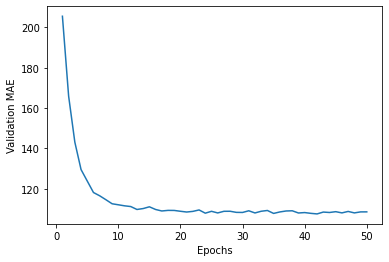

In [28]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [85]:
from keras import models
model = models.load_model('fold_8.h5')
y_pred = model.predict(x_test)


In [86]:
y_pred = np.reshape(y_pred, (-1,))

In [87]:
sample = pd.read_csv('data/sample_submission.csv')

In [88]:
sample.congestion = y_pred

In [89]:
sample = sample.round(1)

In [90]:
sample

,row_id,congestion
0,848835,46.799999
1,848836,36.400002
2,848837,49.500000
3,848838,31.299999
4,848839,65.900002
...,...,...
2335,851170,56.700001
2336,851171,32.299999
2337,851172,64.199997
2338,851173,25.100000


In [91]:
sample.to_csv('submission.csv', index=False)